# Exercise: NEISS, Question Set R

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Using codebooks
- Reading tab-separated files
- Ignoring bad lines
- Replacing LOTS of values
- Merging dataframes
- Using numpy/`np.nan`
- Padding strings
- String search using regular expressions

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [77]:
import pandas as pd

In [78]:
df_neiss = pd.read_csv('nss15.tsv', delimiter='\t', error_bad_lines=False, dtype={'prod1': str, 'prod2': str})

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


### Check that your dataframe has 357727 rows and 19 columns.

In [79]:
df_neiss.shape

(357727, 19)

### List the columns and their data types

In [80]:
df_neiss.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [81]:
# According to the coding manual:
# trmt_date: Code the date on which the patient was seen for treatment. Use two digits each for the month and day and four digits for the year, in that order. Whenever the month or day is 1 digit (1-9), add a zero in front of the number, i.e., 1 becomes 01, 2 becomes 02, etc.
# body_part: Use the codes in the table which follows for the body part affected in the product related incident. Also see Appendix C. The body part diagram in Appendix D will help you visualize more clearly the boundaries of such parts as lower trunk, upper arm, etc.
# narr1: Every case MUST include descriptive comments or remarks. Enter these notes on the two lines labeled "Comment" that immediately follow the coded entries. Be sure to include the body part and diagnosis from the ED chart, as well as the patient’s age and gender in the comment.
# diag: The diagnosis codes are listed in the table which follows. Use the attending physician's diagnosis to determine the nature of an injury. If the attending physician's diagnosis is missing, use diagnostic information provided by a medical professional to select the appropriate code. If the record contains no diagnosis by medical personnel, review the patient's complaint and the treatment given to arrive at the most logical diagnosis.

# Cleaning up a column

Take a look at the **body part** column. How many rows of each body part are there?

In [82]:
df_neiss['body_part'].value_counts()

75    58677
76    30992
79    30579
92    30463
37    20077
31    19518
35    18957
82    17077
83    15890
30    14822
33    13655
36    12771
34    11565
32     8888
85     8615
88     7336
93     7299
89     6145
77     4661
94     4404
81     4174
80     4016
0      3344
87     2079
38     1699
84       24
Name: body_part, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to pages 11-12 of the column definitions file, or... hey, I typed it in below!

- Tip: If I've already talked about how to replace values, maybe there's a really easy way to replace a lot at once? Maybe I'll tell you if you ask me?

In [83]:
body_parts = {
    0:  'internal',
    30: 'shoulder',
    31: 'upper trunk',
    32: 'elbow',
    33: 'lower arm',
    34: 'wrist',
    35: 'knee',
    36: 'lower leg',
    37: 'ankle',
    38: 'pubic region',
    75: 'head',
    76: 'face',
    77: 'eyeball',
    79: 'lower trunk',
    80: 'upper arm',
    81: 'upper leg',
    82: 'hand',
    83: 'foot',
    84: '25-50% of body',
    85: 'all parts of body',
    87: 'not recorded',
    88: 'mouth',
    89: 'neck',
    92: 'finger',
    93: 'toe',
    94: 'ear'
}

In [84]:
df_neiss['body_part'].replace(body_parts, inplace=True)

In [85]:
df_neiss['body_part'].value_counts()

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
not recorded          2079
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## Confirm you have 58677 head, 30992 face, and 30579 lower trunk.

Isn't this much nicer?

In [86]:
body_parts = [
    'head',
    'face',
    'lower trunk'
]
df_neiss[df_neiss['body_part'].isin(body_parts)]['body_part'].value_counts()

head           58677
face           30992
lower trunk    30579
Name: body_part, dtype: int64

## Graph the number of each body part, but don’t included the “Not Recorded” records

In [87]:
df_neiss[df_neiss['body_part'] != 'not recorded']['body_part'].value_counts()

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## "Not Recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [88]:
import numpy as np
df_neiss['body_part'].replace('not recorded', np.nan, inplace=True)

## Graph the count of each body part, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

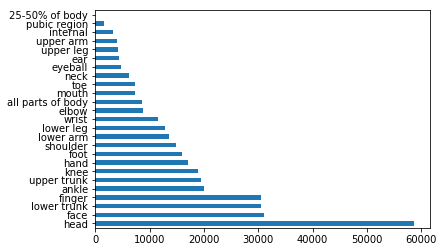

In [89]:
%matplotlib inline
# value_counts ignore NaN values by default
df_neiss['body_part'].value_counts().plot(kind='barh')

## For each body part, get the average age of the person who injured that part

Sort from youngest to oldest

In [90]:
# We changed the not recorded by NaN before...
# have to use a placeholder to get it back
df_neiss.fillna('not recorded').groupby('body_part')['age'].mean().apply(lambda x: str(int(x)) + ' yo')

body_part
25-50% of body       44 yo
all parts of body    63 yo
ankle                28 yo
ear                  24 yo
elbow                36 yo
eyeball              36 yo
face                 47 yo
finger               35 yo
foot                 32 yo
hand                 35 yo
head                 59 yo
internal             62 yo
knee                 34 yo
lower arm            32 yo
lower leg            44 yo
lower trunk          49 yo
mouth                51 yo
neck                 38 yo
not recorded         79 yo
pubic region         19 yo
shoulder             39 yo
toe                  34 yo
upper arm            46 yo
upper leg            45 yo
upper trunk          46 yo
wrist                30 yo
Name: age, dtype: object

## Wait, "not recorded" seems really really really really old!

How can the average age be like 80???? Read page 6 of the documentation. Fix the issue however you think is best, but explain what you're doing. **It would be nice to talk about this in class if you'd write it on the board!**

### Tech tip you might find useful

If you want to replace a column based on a condition, pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [91]:
# Age Code
# Three weeks 201 
# Four weeks (one month) 201 
# Seven weeks 201 
# Ten weeks 202 
# Nine months 209 
# Twelve months (one year) 212 
# Eighteen months 218

df_neiss.loc[(df_neiss['age'] > 200) & (df_neiss['age'] < 212), 'age'] = 0
df_neiss.loc[(df_neiss['age'] >= 212) & (df_neiss['age'] < 224), 'age'] = 1

# Finding injuries

## How many people were injured by "Musical instruments, electric or battery operated?"

Try to do what you think would work, then see... it doesn't work. There are all kinds of reasons why it wouldn't work. Keep reading once it doesn't work for you.

- Tip: `prod1` and `prod2` are the product fields
- Tip: You can use the codebook or `cleaned-categories.txt`

In [92]:
# 0565,"Musical instruments, electric or battery operated"
len(df_neiss[(df_neiss['prod1'] == 565) | (df_neiss['prod2'] == 565)])

0

### Did something go wrong when you read in your data?

Maybe it's one of those problems like we had with `008382` in the homework, where when we read in the file it got rid of the leading zeroes? Try to read the file in again and fix that.

Try to get all of the "Musical instruments, electric or battery operated" injurie again. It still won't work. Keep reading.

In [93]:
#df_neiss = pd.read_csv('nss15.tsv', delimiter='\t', error_bad_lines=False, dtype={'prod1': str, 'prod2': str})

### Looks the data export is bad!

They turned `0565` into `565` when they exported it or something (so irresponsible!), and it's up to us to fix it. Pad the `prod1` and `prod2` columns to be the proper length. If you didn't actually do the task above it's going to be more difficult.

In [94]:
df_neiss.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part       object
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

In [95]:
df_neiss['prod1'] = df_neiss['prod1'].str.pad(4, fillchar='0')
df_neiss['prod2'] = df_neiss['prod2'].str.pad(4, fillchar='0')

In [96]:
df_neiss.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,wrist,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,knee,1,0,0,0611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,head,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## How many people were injured by musical instruments, total?

Include normal musical instruments, electric musical instruments and toy musical instruments.

- Tip: You can use the codebook or `cleaned-categories.txt`
- Tip: Answer this in one line **without** using `and` or `&`.

In [97]:
musical_codes = ['0565', '0566', '1344', ]
len(df_neiss[(df_neiss['prod1'].isin(musical_codes)) | (df_neiss['prod2'].isin(musical_codes))])

251

## Out of those three, which is the most popular reason for admission?

In [98]:
(df_neiss['prod1'].value_counts()
 .add(df_neiss['prod2'].value_counts(), fill_value=0)
 .sort_values(ascending=False)).nlargest(1)

1807    41907.0
dtype: float64

## What parts of the body are injured by musical instruments most often?

In [99]:
(df_neiss[
    (df_neiss['prod1'].isin(musical_codes)) | 
    (df_neiss['prod2'].isin(musical_codes))]['body_part']
 .value_counts())

head                 39
face                 36
finger               23
upper trunk          21
mouth                20
lower trunk          17
shoulder             13
wrist                13
toe                  10
foot                  9
knee                  7
lower arm             6
eyeball               6
all parts of body     6
hand                  5
neck                  5
elbow                 4
lower leg             3
ear                   3
ankle                 2
internal              1
upper arm             1
Name: body_part, dtype: int64

# Adding categories

## Read in `categories-cleaned.txt`

In [111]:
df_categories = pd.read_csv('categories-cleaned.txt', dtype={'product_code':str})

## How many different categories are electric/electrical/electronic?

In [112]:
len(df_categories[df_categories['products'].str.contains('electr')])

25

## Join this with your injuries dataframes to give every row a text product code

In [138]:
df_categories['product_code'] = df_categories['product_code'].str.pad(4, fillchar='0')
df_merged = df_neiss.merge(df_categories, left_on='prod1', right_on='product_code', how='outer')
df_merged = df_merged.merge(df_categories, left_on='prod2', right_on='product_code', how='outer')

## How many different injuries involved an electric/electrical/electronic product?

In [156]:
len((df_merged[
    (df_merged['products_x'].str.contains('electr', na=False)) | 
    df_merged['products_y'].str.contains('electr', na=False)]))

2973

## Graph the most common injuries involving an electrical product

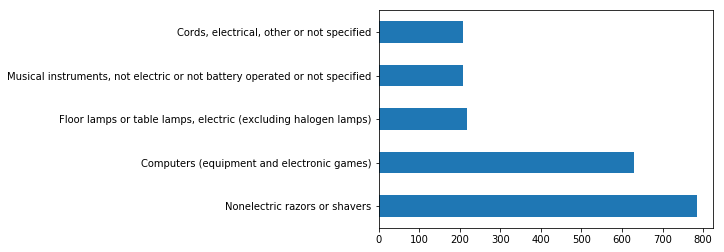

In [185]:
df_electric = (df_merged[
    (df_merged['products_x'].str.contains('electr', na=False)) | 
    df_merged['products_y'].str.contains('electr', na=False)])

(df_electric['products_x'].value_counts()
 .add(df_electric['products_y'].value_counts())
 .sort_values(ascending=False)
 .head(5)
 .plot(kind='barh'))

## When people get injuries using an electrical product, what part of their body is injured?

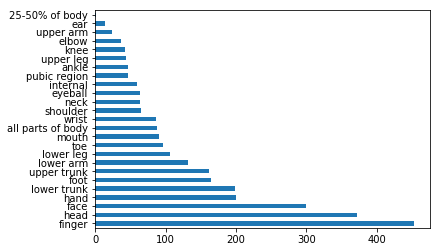

In [161]:
(df_merged[
    (df_merged['products_x'].str.contains('electr', na=False)) | 
    df_merged['products_y'].str.contains('electr', na=False)]['body_part']
.value_counts()
.plot(kind='barh'))

## What product is most likely to injure your mouth?

In [170]:
(df_merged[df_merged['body_part'] == 'mouth']['products_x'].value_counts()
 .add(df_merged[df_merged['body_part'] == 'mouth']['products_y'].value_counts(),
     fill_value=0)
 .sort_values(ascending=False).head(1))

Floors or flooring materials    942.0
dtype: float64

## What product is most likely to injure your ears?

In [172]:
(df_merged[df_merged['body_part'] == 'ear']['products_x'].value_counts()
 .add(df_merged[df_merged['body_part'] == 'ear']['products_y'].value_counts(),
     fill_value=0)
 .sort_values(ascending=False).head(1))

Jewelry (excluding watches)    1223.0
dtype: float64